The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


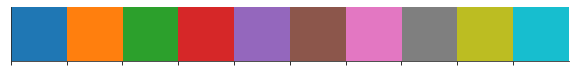

In [3]:
%load_ext autoreload
%autoreload 2
%run __init__
rs_path = path['RSRCH'](0)
fig_path = './figures/e000'
try:
    os.mkdir(fig_path)
except:
    pass

stdout_orig = sys.stdout

flatui = ["#46637f", "#2ecc71", "#e74c3c", "#3498db", "#9b59b6", "#95a5a6"]
sns.palplot(sns.color_palette("tab10"))
sns.set_palette("tab10")

## Change in Reported Seizure Frequency

In [ ]:
df_npref = path['CORE']['RNS']['NP_Ref']

In [4]:
# Compute 1-Sample t-test (mean=0)
tv, pv = sp_stats.ttest_1samp(df_npref['Pct_Seizure_Reduction_Last_Visit'], 0)

# Box/Swarmplot
fig = plt.figure(figsize=(1,4), dpi=300)
ax = plt.subplot(111)
ax = sns.boxplot(y='Pct_Seizure_Reduction_Last_Visit', data=df_npref, fliersize=0,
                 color='w', ax=ax)
ax = sns.swarmplot(y='Pct_Seizure_Reduction_Last_Visit', data=df_npref,
                   color='k', size=3, ax=ax)
ax.text(x=-0.4, y=80,
        s='t_{} = {:0.2f}\np = {:0.2e}'.format(
            len(df_npref['Pct_Seizure_Reduction_Last_Visit'])-1,
            tv, pv), fontsize=8)
ax.hlines(-50, -1, 1, color='r')
ax.hlines(-90, -1, 1, color='r')
ax.set_ylim([-105, 105])
ax.set_ylabel('% Change in Seizure Frequency (LOCF)')
ax.set_xticks([])

plt.savefig('{}/LOCF_Population.svg'.format(fig_path), dpi=300)
plt.show()

print('Median % Change in Reported Seizures (LOCF): {}'.format(df_npref['Pct_Seizure_Reduction_Last_Visit'].median()))
print('Mean % Change in Reported Seizures (LOCF): {} +/- {}'.format(
    df_npref['Pct_Seizure_Reduction_Last_Visit'].mean(), df_npref['Pct_Seizure_Reduction_Last_Visit'].sem()))
print('Responder Rate: {}'.format((df_npref['Pct_Seizure_Reduction_Last_Visit'] <= -50).mean()))
print(df_npref.groupby(['Responder_Type'])['Pct_Seizure_Reduction_Last_Visit'].count() / len(df_npref))

NameError: name 'df_npref' is not defined

## Average Therapy per Day

### Generate Therapy Count dataframe

In [5]:
therapy_dict = {'NP_code': [],
                'N_therapy': [],
                'N_LE': [],
                'N_Days': []}

for np_code in np.array(df_npref['NP_code']):
    print(np_code)
    
    try:
        df_count = utils.neuropaceIO.get_hourly_data_dict(path['CORE']['RNS']['HOURLY'][np_code])
        df_count = df_count[df_count.index > df_npref[df_npref['NP_code'] == np_code]['Date_Stim_On'].iloc[0]]
        n_therapy = df_count['episode_starts_with_rx'].resample('1D').sum().mean()
        n_le = df_count['long_episodes'].resample('1D').sum().mean()
        n_day = (df_count.index[-1]-df_npref[df_npref['NP_code'] == np_code]['Date_Stim_On'].iloc[0]).days
        
        therapy_dict['NP_code'].append(np_code)
        therapy_dict['N_therapy'].append(n_therapy)
        therapy_dict['N_LE'].append(n_le)  
        therapy_dict['N_Days'].append(n_day) 
    except Exception as E:
        print(E)
        continue
therapy_dict = pd.DataFrame.from_dict(therapy_dict)

therapy_dict = pd.merge(therapy_dict,
                        df_npref[['NP_code', 'N_Vs_MT', 'LE_PPV_Reliability',
                           'Responder_Type', 'Pct_Seizure_Reduction_Last_Visit']],
                        on='NP_code')

NP1
NP2
NP3
NP4
NP5


/userdata/akhambhati/Dev/virtualenvs/rs_2018_SpikeControl/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3337: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


NP6
NP7
NP9
NP10
NP11
NP12
NP13
NP14
NP15
NP16
NP17
NP18
NP19
NP55
NP20
NP21
NP22
NP23
NP24
NP25
NP26
NP27
NP28
NP29
NP30
index -1 is out of bounds for axis 0 with size 0
NP31
NP33
NP32
NP34
NP35
NP36
NP37
NP38
NP39
NP41
NP40
NP42
NP43
NP44
NP45
NP46
NP47
NP48
NP49
index -1 is out of bounds for axis 0 with size 0
NP50
index -1 is out of bounds for axis 0 with size 0
NP51
index -1 is out of bounds for axis 0 with size 0


### Plot Distribution of Therapy Lengths

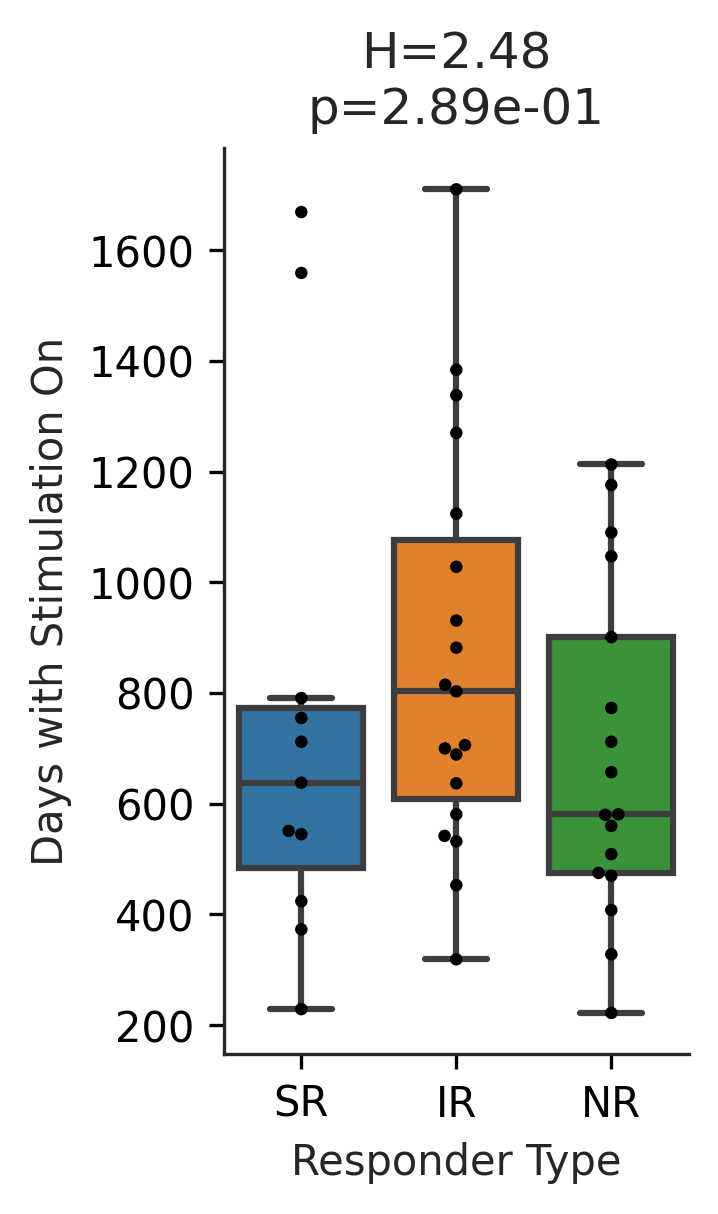

In [6]:
# Compute One-way ANOVA
Hv, pv = sp_stats.kruskal(therapy_dict[therapy_dict['Responder_Type'] == 'SR']['N_Days'],
                          therapy_dict[therapy_dict['Responder_Type'] == 'IR']['N_Days'],
                          therapy_dict[therapy_dict['Responder_Type'] == 'NR']['N_Days'])
                          

# Box/Swarmplot
fig = plt.figure(figsize=(2,4), dpi=300)
ax = plt.subplot(111)
ax = sns.boxplot(x='Responder_Type', y='N_Days',
                 order=['SR', 'IR', 'NR'],
                 data=therapy_dict, fliersize=0, ax=ax)
ax = sns.swarmplot(x='Responder_Type', y='N_Days',
                   order=['SR', 'IR', 'NR'],
                   data=therapy_dict, color='k', size=3, ax=ax)
ax.set_ylabel('Days with Stimulation On')
ax.set_xlabel('Responder Type')
ax.set_title('H={:0.2f}\np={:0.2e}'.format(Hv, pv))
plt.savefig('{}/Responder_TherapyTime.svg'.format(fig_path), dpi=300)
plt.show()

### Plot Distribution of Therapies

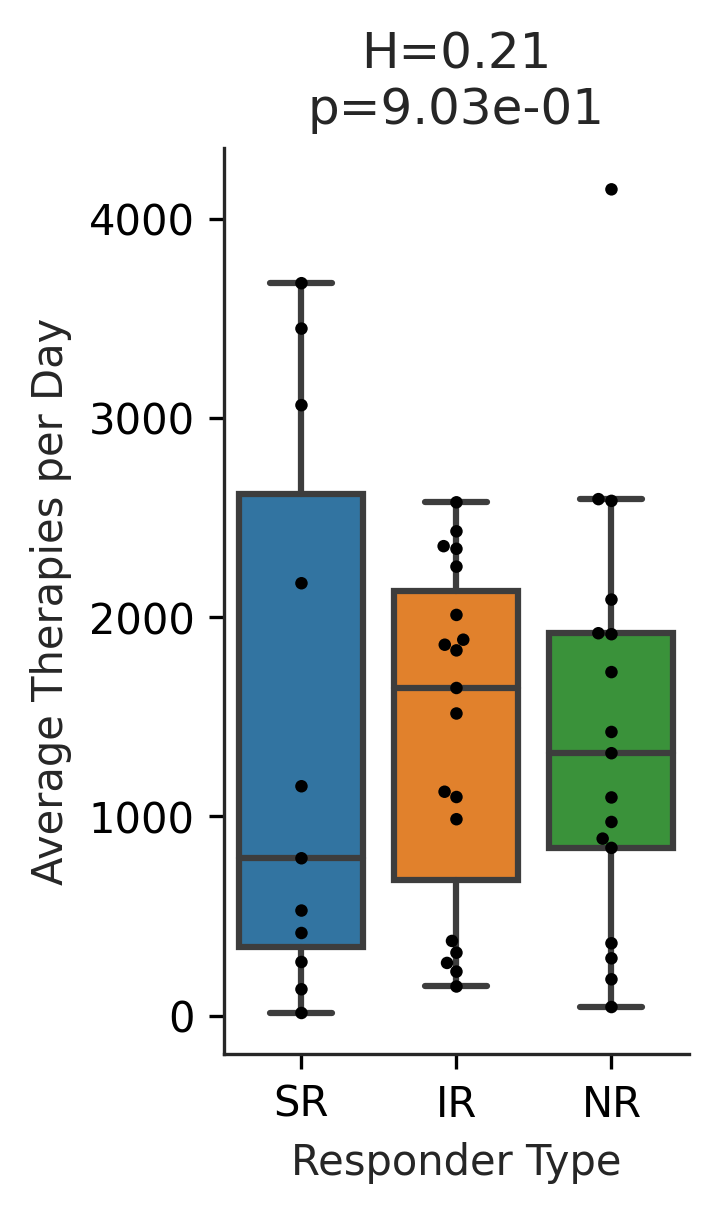

In [7]:
# Compute One-way ANOVA
Hv, pv = sp_stats.kruskal(therapy_dict[therapy_dict['Responder_Type'] == 'SR']['N_therapy'],
                          therapy_dict[therapy_dict['Responder_Type'] == 'IR']['N_therapy'],
                          therapy_dict[therapy_dict['Responder_Type'] == 'NR']['N_therapy'])
                          

# Box/Swarmplot
fig = plt.figure(figsize=(2,4), dpi=300)
ax = plt.subplot(111)
ax = sns.boxplot(x='Responder_Type', y='N_therapy',
                 order=['SR', 'IR', 'NR'],
                 data=therapy_dict, fliersize=0, ax=ax)
ax = sns.swarmplot(x='Responder_Type', y='N_therapy',
                   order=['SR', 'IR', 'NR'],
                   data=therapy_dict, color='k', size=3, ax=ax)
ax.set_ylabel('Average Therapies per Day')
ax.set_xlabel('Responder Type')
ax.set_title('H={:0.2f}\np={:0.2e}'.format(Hv, pv))
plt.savefig('{}/LOCF_TherapyRate.svg'.format(fig_path), dpi=300)
plt.show()


### Plot Distribution of long episodes in PPV patients

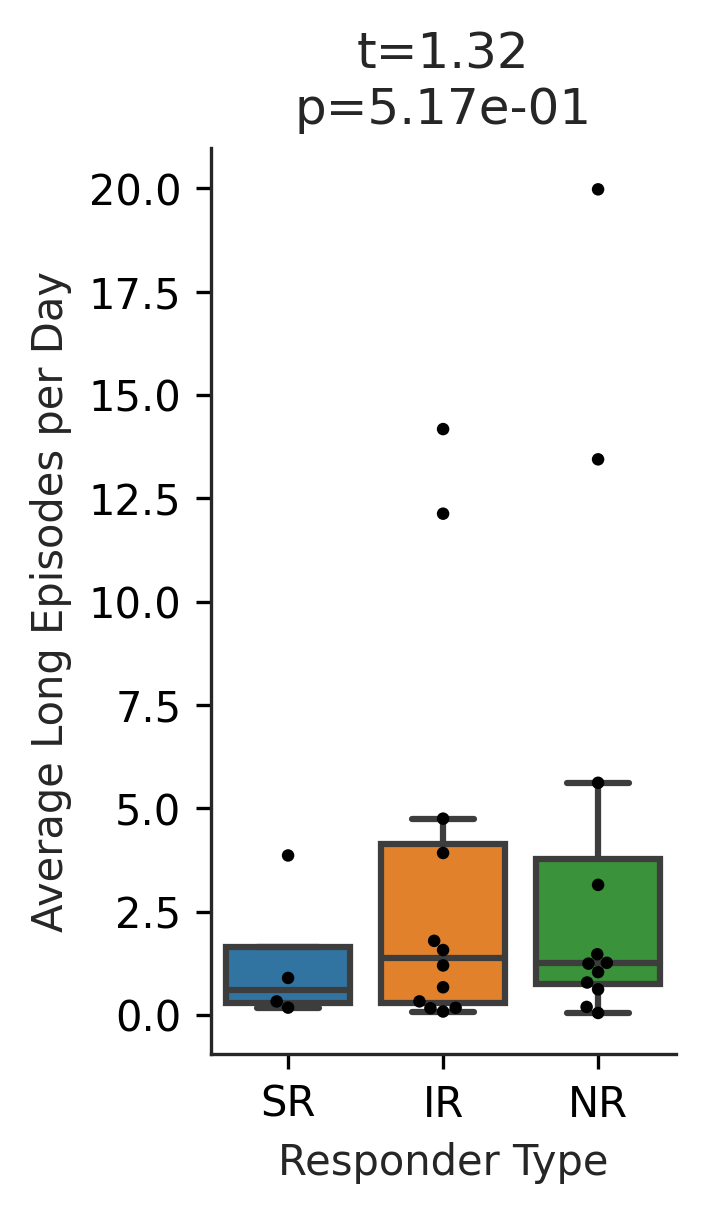

In [8]:
therapy_dict2 = therapy_dict[therapy_dict['LE_PPV_Reliability'] == 1.0]

# Compute One-way ANOVA
tv, pv = sp_stats.kruskal(therapy_dict[therapy_dict['Responder_Type'] == 'SR']['N_LE'],
                           therapy_dict[therapy_dict['Responder_Type'] == 'IR']['N_LE'],
                           therapy_dict[therapy_dict['Responder_Type'] == 'NR']['N_LE'])
                          

# Box/Swarmplot
fig = plt.figure(figsize=(2,4), dpi=300)
ax = plt.subplot(111)
ax = sns.boxplot(x='Responder_Type', y='N_LE',
                 order=['SR', 'IR', 'NR'],
                 data=therapy_dict2, fliersize=0, ax=ax)
ax = sns.swarmplot(x='Responder_Type', y='N_LE',
                   order=['SR', 'IR', 'NR'],
                   data=therapy_dict2, color='k', size=3, ax=ax)
ax.set_ylabel('Average Long Episodes per Day')
ax.set_xlabel('Responder Type')
ax.set_title('t={:0.2f}\np={:0.2e}'.format(tv, pv))
plt.savefig('{}/LOCF_LongEpisodeRate.svg'.format(fig_path), dpi=300)
plt.show()


## Time-Dependent Change in Seizure Frequency

In [9]:
# Get therapy duration and Create Dummy DataFrame
df_npref['Days Since Implant'] = pd.to_numeric(
    df_npref['Date_Visit']-df_npref['Date_First_Implant']) * \
                                1e-9 / (60*60*24)

df_npref['Days Since Stimulation On'] = pd.to_numeric(
    df_npref['Date_Visit']-df_npref['Date_Stim_On']) * \
                                1e-9 / (60*60*24)

### From Implant Date

0.007630592097164576 0.9576178821208772


/userdata/akhambhati/Dev/virtualenvs/rs_2018_SpikeControl/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


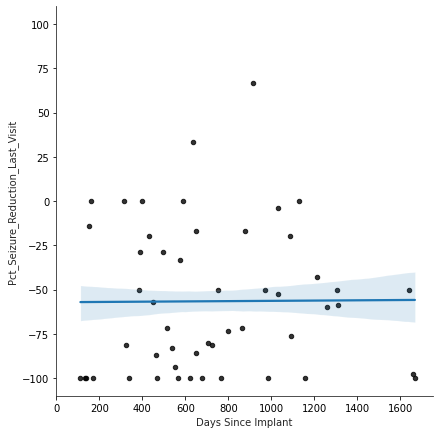

In [10]:
df_temp = df_npref[(df_npref['Days Since Implant'] > 0)]

# Compute Pearson Correlation
rv, pv = sp_stats.pearsonr(df_temp['Days Since Implant'], df_temp['Pct_Seizure_Reduction_Last_Visit'])
print(rv, pv) 

# Box/Swarmplot
g = sns.lmplot(x='Days Since Implant', y='Pct_Seizure_Reduction_Last_Visit', truncate=True,
               data=df_temp,
               ci=68, scatter_kws={'s': 20, 'color': 'k'},
               size=6, aspect=1)
g = (g.set(ylim=(-110, 110), xlim=(0, 1750)))
plt.savefig('{}/LOCF_Duration.svg'.format(fig_path), dpi=300)
plt.show()

### From Stim On Date

/userdata/akhambhati/Dev/virtualenvs/rs_2018_SpikeControl/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


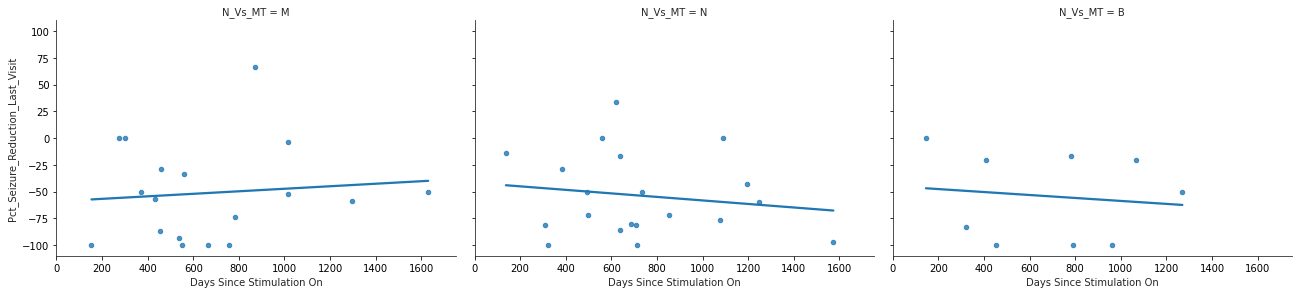

In [11]:
df_temp = df_npref[df_npref['Days Since Stimulation On'] > 0]

# Compute Pearson Correlation
rv, pv = sp_stats.pearsonr(df_temp['Days Since Stimulation On'],
                           df_temp['Pct_Seizure_Reduction_Last_Visit'])

# Box/Swarmplot
g = sns.lmplot(x='Days Since Stimulation On',
               y='Pct_Seizure_Reduction_Last_Visit',
               data=df_temp, col='N_Vs_MT',
               ci=0, scatter_kws={'s': 20},
               size=4, aspect=1.5)
g = (g.set(ylim=(-110, 110), xlim=(0, 1750)))

plt.show()

## Dependence of Efficacy on Clinical Factors

### From Location (MTL vs Neocortical)

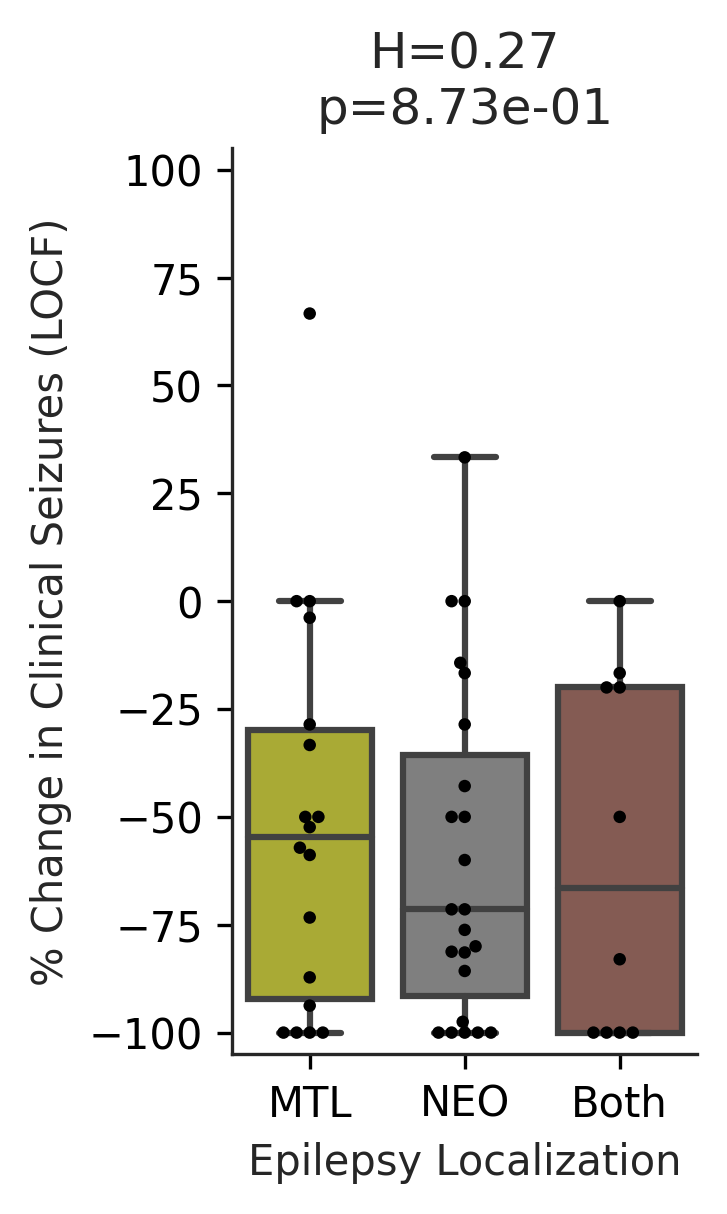

In [12]:
tv0, pv0 = sp_stats.kruskal(df_npref[df_npref['N_Vs_MT'] == 'N']['Pct_Seizure_Reduction_Last_Visit'],
                            df_npref[df_npref['N_Vs_MT'] == 'M']['Pct_Seizure_Reduction_Last_Visit'],
                            df_npref[df_npref['N_Vs_MT'] == 'B']['Pct_Seizure_Reduction_Last_Visit'])

# Box/Swarmplot
sns.set_palette("tab10_r")
fig = plt.figure(figsize=(2,4), dpi=300)
ax = plt.subplot(111)
ax = sns.boxplot(x='N_Vs_MT', y='Pct_Seizure_Reduction_Last_Visit', data=df_npref,
                 fliersize=0, ax=ax)
ax = sns.swarmplot(x='N_Vs_MT', y='Pct_Seizure_Reduction_Last_Visit', data=df_npref,
                   color='k', size=3, ax=ax)
ax.set_ylim([-105, 105])

ax.set_xlabel('Epilepsy Localization')
ax.set_ylabel('% Change in Clinical Seizures (LOCF)')
ax.set_xticklabels(['MTL', 'NEO', 'Both'])

ax.set_title('H={:0.2f}\np={:0.2e}'.format(tv0, pv0))
plt.savefig('{}/LOCF_Localization.svg'.format(fig_path), dpi=300)
plt.show()

### From Etiology

/userdata/akhambhati/Dev/virtualenvs/rs_2018_SpikeControl/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 15.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


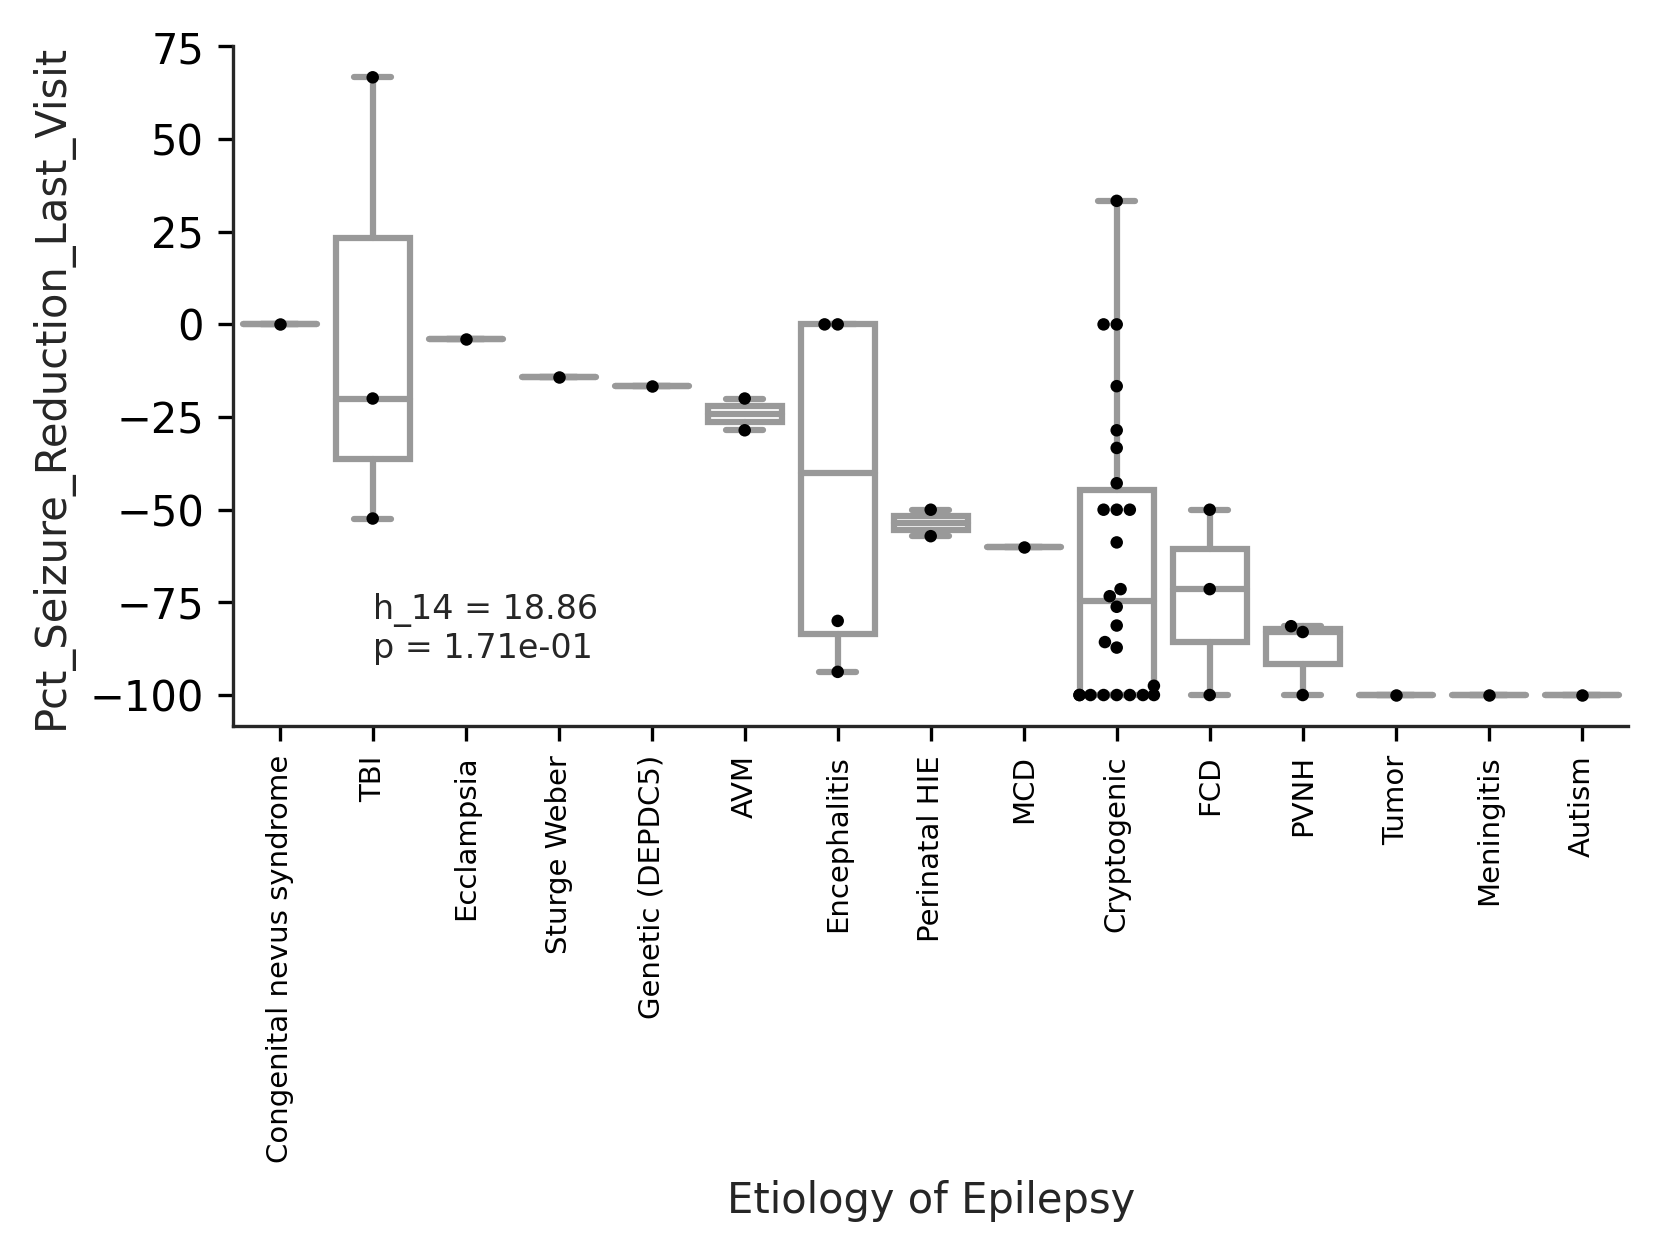

In [13]:
lbl_order = np.array(df_npref.groupby(['Etiology of Epilepsy']).mean()\
                     ['Pct_Seizure_Reduction_Last_Visit'].dropna().sort_values(ascending=False).index)

# Stats
hv, pv = sp_stats.kruskal(
    *[np.array(df_npref[df_npref['Etiology of Epilepsy'] == g]['Pct_Seizure_Reduction_Last_Visit'])
     for g in lbl_order],
    nan_policy='omit')

# Box/Swarmplot
fig = plt.figure(figsize=(6,3), dpi=300)
ax = plt.subplot(111)
ax = sns.boxplot(x='Etiology of Epilepsy',
                 y='Pct_Seizure_Reduction_Last_Visit', data=df_npref,
                 order=lbl_order, color='w', ax=ax)
ax = sns.swarmplot(x='Etiology of Epilepsy',
                   y='Pct_Seizure_Reduction_Last_Visit', data=df_npref,
                   order=lbl_order, color='k', size=3, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=7)
ax.text(x=1, y=-90,
        s='h_{} = {:0.2f}\np = {:0.2e}'.format(len(lbl_order)-1, hv, pv),
        fontsize=8)
plt.show()

### From Epilepsy Onset Age

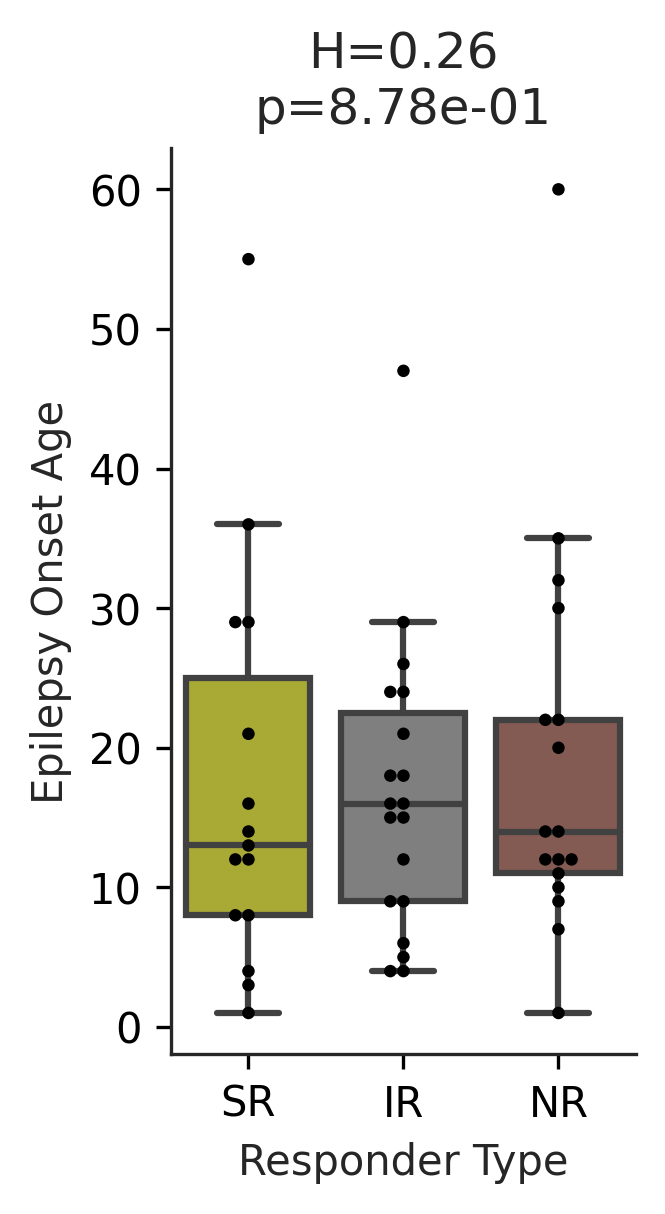

In [14]:
# Compute One-way ANOVA
tv, pv = sp_stats.kruskal(df_npref[df_npref['Responder_Type'] == 'SR']['Epilepsy Onset Age'],
                          df_npref[df_npref['Responder_Type'] == 'IR']['Epilepsy Onset Age'],
                          df_npref[df_npref['Responder_Type'] == 'NR']['Epilepsy Onset Age'])
                          

# Box/Swarmplot
fig = plt.figure(figsize=(2,4), dpi=300)
ax = plt.subplot(111)
ax = sns.boxplot(x='Responder_Type', y='Epilepsy Onset Age',
                 order=['SR', 'IR', 'NR'],
                 data=df_npref, fliersize=0, ax=ax)
ax = sns.swarmplot(x='Responder_Type', y='Epilepsy Onset Age',
                   order=['SR', 'IR', 'NR'],
                   data=df_npref, color='k', size=3, ax=ax)
ax.set_ylabel('Epilepsy Onset Age')
ax.set_xlabel('Responder Type')
ax.set_title('H={:0.2f}\np={:0.2e}'.format(tv, pv))
plt.savefig('{}/LOCF_OnsetAge.svg'.format(fig_path), dpi=300)
plt.show()

### From Duration of Epilepsy

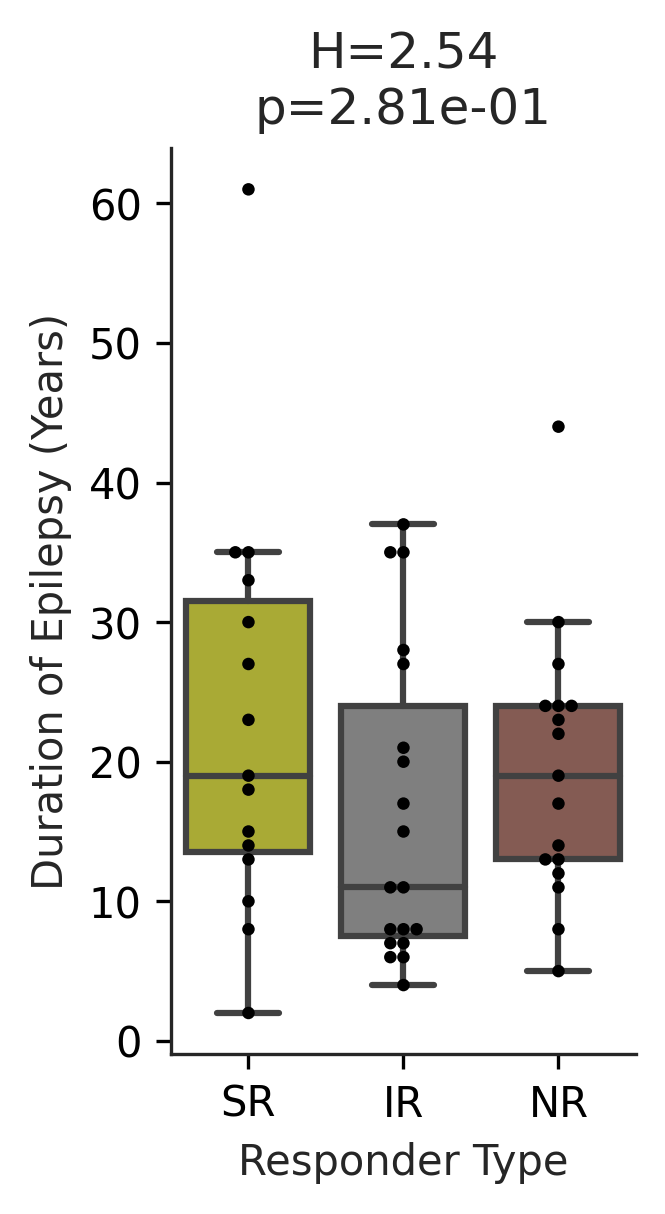

In [15]:
# Compute One-way ANOVA
tv, pv = sp_stats.kruskal(df_npref[df_npref['Responder_Type'] == 'SR']['Duration of Epilepsy (Years)'],
                          df_npref[df_npref['Responder_Type'] == 'IR']['Duration of Epilepsy (Years)'],
                          df_npref[df_npref['Responder_Type'] == 'NR']['Duration of Epilepsy (Years)'])
                          

# Box/Swarmplot
fig = plt.figure(figsize=(2,4), dpi=300)
ax = plt.subplot(111)
ax = sns.boxplot(x='Responder_Type', y='Duration of Epilepsy (Years)',
                 order=['SR', 'IR', 'NR'],
                 data=df_npref, fliersize=0, ax=ax)
ax = sns.swarmplot(x='Responder_Type', y='Duration of Epilepsy (Years)',
                   order=['SR', 'IR', 'NR'],
                   data=df_npref, color='k', size=3, ax=ax)
ax.set_ylabel('Duration of Epilepsy (Years)')
ax.set_xlabel('Responder Type')
ax.set_title('H={:0.2f}\np={:0.2e}'.format(tv, pv))
plt.savefig('{}/LOCF_OnsetDuration.svg'.format(fig_path), dpi=300)
plt.show()

## Dependence of Efficacy on Lead Geometry

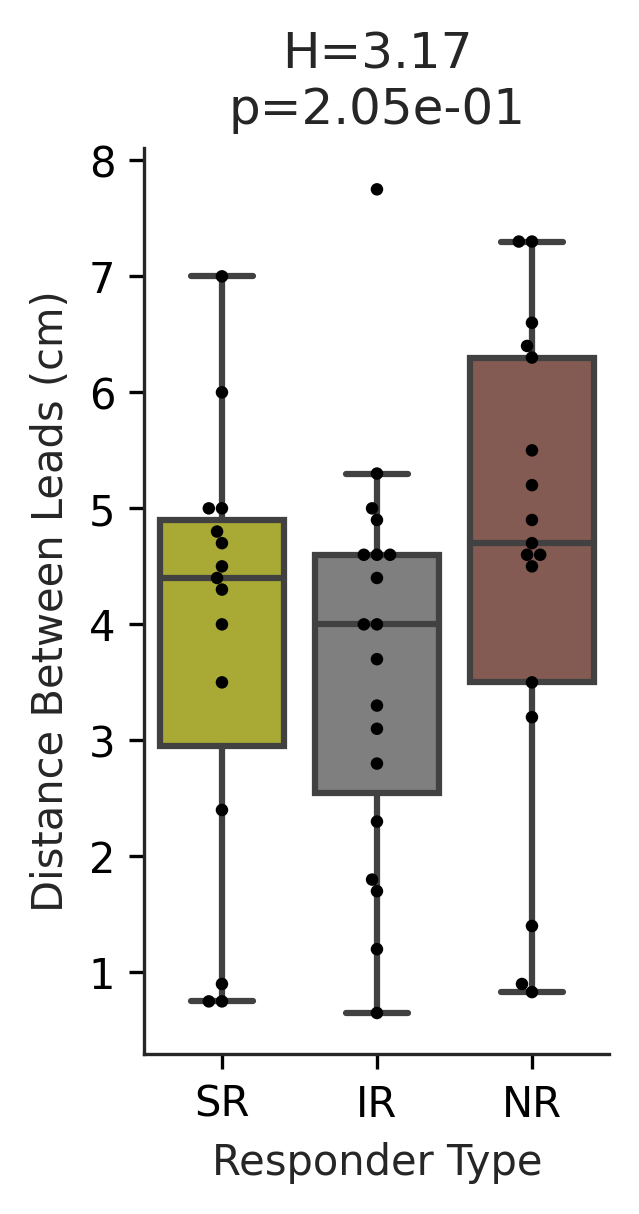

In [16]:
# Compute One-way ANOVA
tv, pv = sp_stats.kruskal(df_npref[df_npref['Responder_Type'] == 'SR']['Inter_Lead_Distance'],
                          df_npref[df_npref['Responder_Type'] == 'IR']['Inter_Lead_Distance'],
                          df_npref[df_npref['Responder_Type'] == 'NR']['Inter_Lead_Distance'])
                          

# Box/Swarmplot
fig = plt.figure(figsize=(2,4), dpi=300)
ax = plt.subplot(111)
ax = sns.boxplot(x='Responder_Type', y='Inter_Lead_Distance',
                 order=['SR', 'IR', 'NR'],
                 data=df_npref, fliersize=0, ax=ax)
ax = sns.swarmplot(x='Responder_Type', y='Inter_Lead_Distance',
                   order=['SR', 'IR', 'NR'],
                   data=df_npref, color='k', size=3, ax=ax)
ax.set_ylabel('Distance Between Leads (cm)')
ax.set_xlabel('Responder Type')
ax.set_title('H={:0.2f}\np={:0.2e}'.format(tv, pv))
plt.savefig('{}/LOCF_InterLeadDistance.svg'.format(fig_path), dpi=300)
plt.show()

# Relate Reported Seizures with Electrographic PPV Seizures

In [ ]:
WIN = pd.Timedelta('30 days')

df_sz_report_ppv = {'NP_code': [],
                    'Visit': [],
                    'Sz_per_Week': [],
                    'episode_starts_with_rx': [],
                    'long_episodes': []}

for np_code in df_outcome['NP_code'].unique():
    ix = np.flatnonzero(df_outcome['NP_code'] == np_code)
    
    sel_outcome = df_outcome.iloc[ix]
    
    try:
        df_hour = pd.read_csv(path['CORE']['RNS']['HOURLY'][np_code], skiprows=3)
        df_hour = df_hour.rename(columns={'utc_start_time': 'Raw UTC Timestamp'})
        df_hour['Raw UTC Timestamp'] = pd.to_datetime(df_hour['Raw UTC Timestamp'])
        df_hour = df_hour.set_index('Raw UTC Timestamp', drop=True)
        
        sel_week = df_hour.resample('W').sum()
        
        for sel_i, sel in enumerate(sel_outcome.iterrows()):
            date = sel[1]['Date_Visit']
            sz = sel[1]['Sz_per_Week']
            
            win_week = sel_week[(sel_week.index > (date-WIN)) &
                                (sel_week.index <= (date+WIN))]
                               
            df_sz_report_ppv['NP_code'].append(np_code)
            df_sz_report_ppv['Visit'].append(sel_i)            
            df_sz_report_ppv['Sz_per_Week'].append(sz)
            df_sz_report_ppv['episode_starts_with_rx'].append(win_week['episode_starts_with_rx'].mean())
            df_sz_report_ppv['long_episodes'].append(win_week['long_episodes'].mean())            
            
            #sel_count = df_hour[['episode_starts', 'episode_starts_with_rx', 'long_episodes']]
    except Exception as E:
        print(np_code, E)
        continue
df_sz_report_ppv = pd.DataFrame.from_dict(df_sz_report_ppv)

In [ ]:
df_sz_report_ppv_merge = pd.merge(df_sz_report_ppv, df_npref[['NP_code', 'LE_PPV_Reliability']],
                            on='NP_code')
df_sz_report_ppv_merge = df_sz_report_ppv_merge[df_sz_report_ppv_merge['LE_PPV_Reliability'] == 1]

rv = []
for np_code in df_sz_report_ppv_merge['NP_code'].unique():
    sel = df_sz_report_ppv_merge[df_sz_report_ppv_merge['NP_code'] == np_code]
    
    rv.append(sp_stats.pearsonr(sel['Sz_per_Week'], sel['episode_starts_with_rx'])[0])

In [ ]:
plt.hist(rv, bins=np.linspace(-1,1,6))